# Project 3 -- Neural Nets
## Amanda Everitt

In this assignment, you will try out your machine learning skills by developing a classifier for transcription factor binding sites. Transcription factors are proteins that bind DNA at promoters to drive gene expression. Most preferentially bind specific patterns of sequence, while ignoring others. Traditional methods to determine this pattern (called a motif) have assumed that binding sites in the genome are all independent. However, there are cases where people have identified motifs where positional interdependencies exist. Interestingly, some of these cases are isomorphic to the XOR problem that killed perceptrons a few decades ago.

To address this, you will implement a multilayer neural network capable of accurately predicting whether a short DNA sequence is a binding site for the yeast transcription factor Rap1.

The data provided include both positive examples of TF binding sites for the yeast transcription factor Rap1 along with negative examples consisting of a few thousand yeast promoters to which Rap1 is known not to bind. The specific input data files are the following:
> 137 true positive binding sites for the yeast Rap1 transcription factor, each 17 base pairs long (rap1-lieb-positives.txt)
> Yeast genomic sequence as the negative training data. (yeast- upstream-1k- negative.fa) Each of the approximately 3000 fasta sequences contains 1000 bases upstream of a yeast gene.
Your tasks for the assignment follow. Please answer the indented questions in your writeup.

In [40]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}

<IPython.core.display.Javascript object>

In [2]:
from scripts import NN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, roc_curve, precision_recall_curve, roc_auc_score
import operator, math
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

## Part 1: Autoencoder implementation (10 points)
1) Implement a feed-forward, neural network with standard sigmoidal units. Your implementation should accept a vector as input, be able to adjust network weights by backpropagation, and report the average loss per epoch. It should also allow for variation in the size of input layer, hidden layers, and output layer. We expect that you will be able to produce fast enough code to be of use in the learning task at hand.
> a. To confirm that your implementation functions correctly, demonstrate its ability to correctly solve the 8 x 3 x 8 autoencoder task. Specifically, set up an autoencoder network consisting of an input layer (8 nodes), a hidden layer (3 nodes), and an output layer (8 nodes), all with sigmoidal units.

### Response:
> The script begins by initializing the weight and bias matrices to small values between -1 and 1. The user can choose to set the seed in this step for a reproducible output as well. The user can also visualize the initialized matrices by printing (NN_object.W1, NN_object.W2, NN_object.bias1, NN_object.bias2). While the size of the layers can change, the script is only adapted to handle one hidden layer. 

> Next, the user will fit the model to the training data and the provided labels. For the autoencoder, the provided labels are identical to the training data since that is what we're trying to predict. In a general neural net, the provided labels could be the class membership for example. The code implements Batch Gradient Descent, so the user must set the number of epochs. This represents the number of iterations 

> AMANDA HERE

### AutoEncoder can (1) initialize a 8 x 3 x 8 network, (2) fit it to all examples of 8 dimensional 1-bit-on vectors, (3) show the error rate decreases over time, and (4) correctly predict the same input vector

In [3]:
amanda_auto  = NN.NeuralNetwork(setup_nodes = (8, 3, 8), 
                             activation = "sigmoid", 
                             seed=1)

training = np.identity(8)
print(training)

amanda_auto.fit(input_data=training, 
                expected_output = training, #here, training is the same as our hopeful prediction
                epochs = 1000, 
                learning_rate = 20,
                lam = 0, 
                verbose=False) #dont want the output to be messy 

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


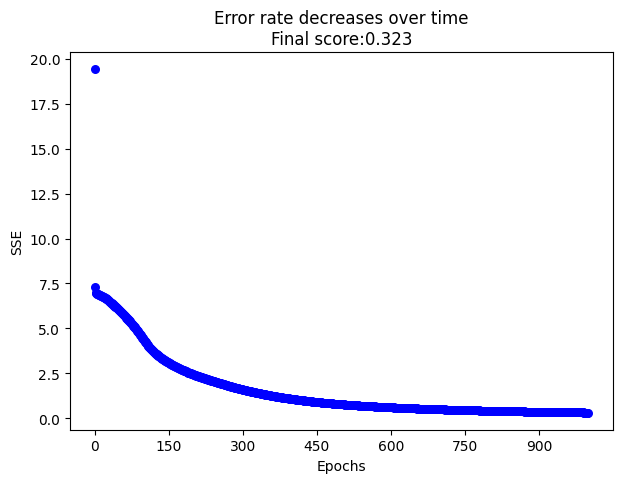

In [4]:
a = np.array(amanda_auto.fit_statistics)
  
ax = plt.figure().gca()
plt.title("Error rate decreases over time\nFinal score:" + str(round(amanda_auto.final_score, 3)))
plt.xlabel("Epochs")
plt.ylabel("SSE")
plt.scatter(a[:,0], a[:,1], 30, c='b')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [5]:
#Can autoencoder predict the same input matrix? 
predict = amanda_auto.predict(training, task=None)
print("Raw scores:\n", predict)

predict = amanda_auto.predict(training, task="round")
print("Binary scores:\n", predict)

Raw scores:
 [[8.42168639e-01 9.93892898e-04 7.96356458e-02 1.68885536e-03
  8.29398909e-02 2.25071234e-03 1.33009291e-05 2.44217477e-02]
 [3.05514973e-03 8.61936429e-01 9.13315591e-02 2.86235763e-03
  7.33500072e-02 3.33493551e-03 7.55975525e-02 6.87247761e-08]
 [1.16605395e-01 7.29606277e-02 8.48905618e-01 4.26899882e-05
  1.22852812e-03 1.14330806e-01 1.17945587e-03 2.36524368e-05]
 [1.62058466e-03 1.20068866e-03 1.89920970e-05 8.46455648e-01
  7.07807572e-02 1.86735931e-03 7.70472309e-02 2.58363996e-02]
 [1.04235982e-01 7.95332659e-02 1.43088098e-03 1.09834572e-01
  8.65125635e-01 5.37069826e-05 9.87803105e-04 6.44866667e-05]
 [2.19943440e-03 9.07245762e-04 8.29364579e-02 1.55722902e-03
  1.22019525e-05 8.40505424e-01 7.53470416e-02 1.23223558e-02]
 [4.57713368e-05 7.64631219e-02 1.44349862e-03 1.05654473e-01
  8.89660125e-04 1.09054889e-01 8.64922043e-01 3.00587966e-05]
 [7.27205804e-02 1.33370585e-05 1.18187657e-03 6.81550215e-02
  1.06276695e-03 7.34174558e-02 1.05770586e-03 9.1

### AutoEncoder can take an input vector, variable number of nodes at each layer, and report the average error per epoch:

In [6]:
amanda_auto  = NN.NeuralNetwork(setup_nodes = (12, 5, 12), 
                             activation = "sigmoid", 
                             seed=1)

input_layer = np.random.randint(2, size=(1,12))
print(input_layer)

amanda_auto.fit(input_data=input_layer, 
                expected_output = input_layer, #here, training is the same as our hopeful prediction
                epochs = 10, 
                learning_rate = 20,
                lam = 0, 
                verbose=True) #dont want the output to be messy 

[[0 1 1 0 0 1 1 0 1 0 1 0]]
>epoch=0, error=3.046
>epoch=1, error=1.901
>epoch=2, error=0.729
>epoch=3, error=0.316
>epoch=4, error=0.204
>epoch=5, error=0.152
>epoch=6, error=0.122
>epoch=7, error=0.102
>epoch=8, error=0.088
>epoch=9, error=0.077


### The same set-up can be used to do standard classification tasks:

In [7]:
X_train = np.asarray(
           [[2.7810836,2.550537003], [1.465489372,2.362125076], [3.396561688,4.400293529],
           [1.38807019,1.850220317],[3.06407232,3.005305973], [7.627531214,2.759262235],
           [5.332441248,2.088626775], [6.922596716,1.77106367],[8.675418651,-0.242068655],
           [7.673756466,3.508563011]]
        )
#Low values are 0s, high values are 1
y_train = np.asarray([[0], [0], [0],
                    [0], [0], [1],
                    [1], [1], [1], 
                    [1]])

X_test = np.asarray([[1.235425, 2.121455],  # should be 0 with the lower scores
                    [6.1234, 2.1234]])  #should be 1 with higher scores
#test comes from:
#https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/
            
amanda_auto  = NN.NeuralNetwork(setup_nodes = (2, 3, 1), 
                             activation = "sigmoid", 
                             seed=1)
amanda_auto.fit(input_data=X_train, 
                expected_output = y_train, #here, training is the same as our hopeful prediction
                epochs = 100, 
                learning_rate = 20,
                lam = 0, 
                verbose=False) #dont want the output to be messy 

predict = amanda_auto.predict(X_test, task=None)
print("Raw scores:\n", predict)

predict = amanda_auto.predict(X_test, task="round")
print("Raw scores:\n", predict)

Raw scores:
 [[0.07240188]
 [0.9135769 ]]
Raw scores:
 [[0.]
 [1.]]


In [8]:
#fix intro

## Part 2: Adapt for classification, and develop training regime (10 points)
2) Set up a procedure to encode DNA sequences (Rap1 binding sites) as input for your neural network. Consider how your encoding strategy may influence your network predictions.
> a. Describe your process of encoding your training DNA sequences into input vectors in detail. Include a description of how you think the representation might affect your network’s predictions.

### Reponse:

> In order to transform DNA sequences, a categorical variable, into a more comparable representation, all sequences were one-hot encoded and flattened into a one-dimensional vector. This could be done by assigning each nucleotide an integer value (e.g. {"A": 0, "T": 1, "C": 2, "G": 3}; however, this implies a ranking (3>1 therfore G>T) which does not reflect biology. Instead, each nt is represented as a four bit vector (e.g. {"A": [1,0,0,0], "T": [0,1,0,0], "C": [0,0,1,0], "G": [0,0,0,1]}. For example, "ATCCG" becomes “[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]” when flattened into 1D. This means for our 17-mers, our input will become a vector of length 68 (17x4). This will also become the input dimension to the neural net. 

> While one-hot encoding is the best option in this situation, it may also introduce higher levels of colinearity. Multiple inputs may appear highly correlated with each other which would highly effect other models, like logistic regression, that assume a normal distribution. In that case, the model would more than likely become overfit. One options around this is to encode additional information along with the four nucleotides that may help differentiate the inputs (e.g. purine vs pyrimidine).

In [9]:
#DNA sequences are one-hot-encoded and optionally flattened into 1D
a = NN.oneHotDNA("ATCCG", flatten = False); print(a)
b = NN.oneHotDNA("ATCCG", flatten = True); print(b)

[[1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]]
[1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0]


In [10]:
#Process all positive sequences into flattened 1D - hot encoded DNA. 
a = NN.process_positives("data/rap1-lieb-positives.txt")
print(a[:5])
#numpy array of 17*4

[array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0]), array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0]), array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0]), array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1]), array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [11]:
#Process negative sequences into flattened 1D - hot encoded DNA. 

#Also, choose how far to downsample, whether to show which sequences were picked
# and the length of the random sequence to select from each (kmer length)
a = NN.process_negatives(fastafile = "data/yeast-upstream-1k-negative.fa", 
                         downsample = 5, # how much to downsample so we can evaluate class balance
                         len_k = 17,      # length of random k-mers to get from the 1kb sequence
                         record = True)   # report which random sequences were selected?
                
print("selected DNA:", a[0])
print("random starts:", a[1])
b = a[2]
print("flattened DNA:", b[:5])

selected DNA: ['YMR176W', 'YBR039W', 'YKL059C', 'YLR073C', 'YMR218C']
random starts: [15, 211, 473, 832, 503]
flattened DNA: [array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0]), array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0]), array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0]), array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0

In [12]:
#done

3) Design a training regime that will use both positive and negative training data to train your predictive model. Note that if you use a naive scheme here, which overweights the negative data, your system will probably not converge (it will just call everything a non-Rap1 site).

Your system should be able to quickly learn aspects of the Rap1 positives that allow elimination of much of the negative training data. Therefore, you may want to be clever about caching negative examples that form "interesting" cases and avoid running through all of the negative data all of the time.

In addition, there are a few factors to consider:
> Your network input is a fixed size - consider how best to modify your negative examples such that they can be input into your network.

> You don't have to use the full 17 bases of each binding site.

> You can use a subset of the data if you think performance can be improved.

> By chance, there may be some examples of subsequences from the negative set that correspond exactly to one of the positive example sequences. If this occurs, you probably should not include the example in your training!

a. Describe your training regime. How was your training regime designed so as to prevent the negative training data from overwhelming the positive training data?

### Reponse:

> To account for the length difference between positive and negative sequences, a random 17-mer was subset from each 3000bp negative sequence. To visualize the initial relationship between sequences, a UMAP was constructed using the Jaccard distance to account for the binary nature of the input variables.  While there is separation in UMAP space between classes, it is also visible that some negative sequences are more closely related to known binding sites than others. These do not correlate to the random start site and seem represent true biological variation. I do not remove these sequences as its important to include a range of negative values to ensure the model is more generalizable. I did add a function ("NN.check_negatives") that will throw an error if any negative values are identical to a positive values; however, this has yet to happen.

> I also assessed whether simple data augmentation could increase our pool of positive samples. I applied a sliding window of 4 over the 17-mers to generate 3, 8-mers. However, this introduced noise, so I did not go forward with this step. Future directions could involve more elevated data augmentations that take into account motifs and mutation rates specifically for Rap1. 

> In the following examples I downsample the negative sequences to 1:2 but I evaluate that choice later in the script. 

Good to go


/usr/local/lib/python3.8/site-packages/umap/umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


Text(0, 0.5, 'UMAP 2')

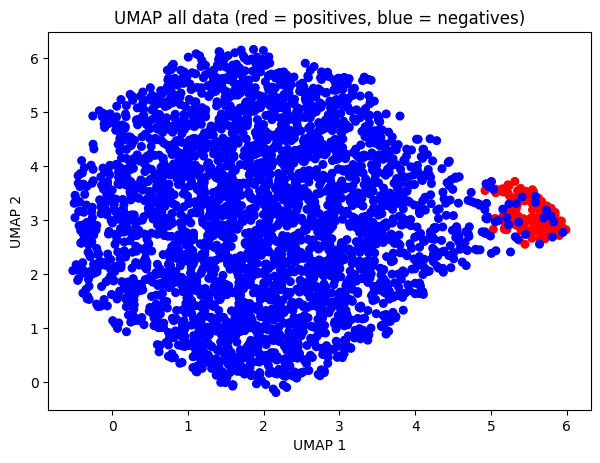

In [13]:
import umap.umap_ as umap
my_pos = NN.process_positives("data/rap1-lieb-positives.txt")
my_negs = NN.process_negatives(fastafile = "data/yeast-upstream-1k-negative.fa", 
                               downsample = None, 
                               len_k = 17,     
                               record = False) 

NN.check_negatives(my_pos, my_negs)

x = np.array(["red", "blue"])
mycol = np.repeat(x, [len(my_pos), len(my_negs)], axis=0)
data = np.vstack((my_pos, my_negs))
fit = umap.UMAP(metric = "jaccard")
u = fit.fit_transform(data)

plt.scatter(u[:,0], u[:,1], c = mycol, s = 30)
plt.title("UMAP all data (red = positives, blue = negatives)")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

/usr/local/lib/python3.8/site-packages/umap/umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


Text(0, 0.5, 'UMAP 2')

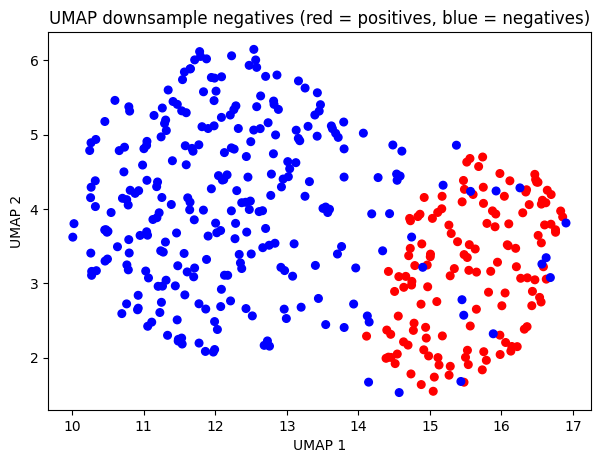

In [14]:
negs = NN.process_negatives(fastafile = "data/yeast-upstream-1k-negative.fa", 
                            downsample = len(my_pos)*2, 
                            len_k = 17,     
                            record = True) 
my_negs = negs[2]
x = np.array(["red", "blue"])
mycol = np.repeat(x, [len(my_pos), len(my_negs)], axis=0)
data = np.vstack((my_pos, my_negs))
fit = umap.UMAP(metric = "jaccard")
u = fit.fit_transform(data)

plt.scatter(u[:,0], u[:,1], c = mycol, s = 30)
plt.title("UMAP downsample negatives (red = positives, blue = negatives)")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

Text(0, 0.5, 'Random start postion of 17-mer in the 1kB provided')

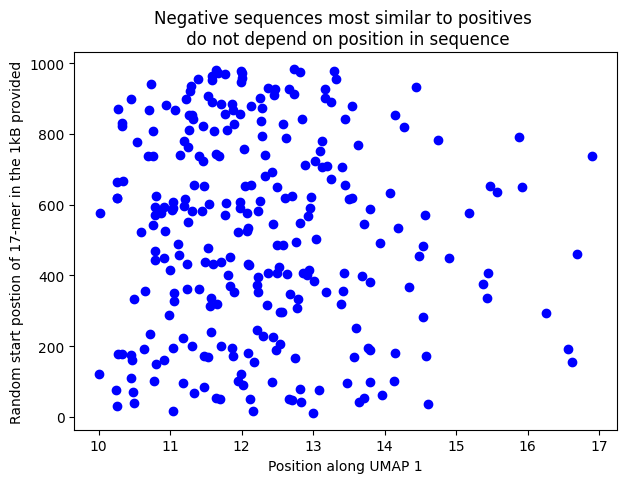

In [15]:
x_axis = u[:,0]
plt.plot(x_axis[len(my_pos):], negs[1], 'o', color='blue')
plt.title("Negative sequences most similar to positives \n do not depend on position in sequence")
plt.xlabel('Position along UMAP 1')
plt.ylabel('Random start postion of 17-mer in the 1kB provided')

/usr/local/lib/python3.8/site-packages/umap/umap_.py:1760: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


Text(0, 0.5, 'UMAP 2')

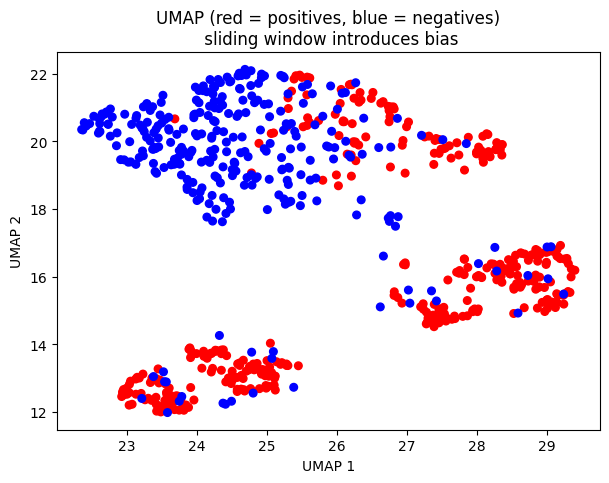

In [16]:
#Try data augmentation
a = NN.process_positives("data/rap1-lieb-positives.txt", 
                         method ="sliding", 
                         window = (3,8,4))
b = NN.process_negatives(fastafile = "data/yeast-upstream-1k-negative.fa", 
                         downsample = 300, 
                         len_k = 8,     
                         record = False) 
x = np.array(["red", "blue"])
mycol = np.repeat(x, [len(a), len(b)], axis=0)
data = np.vstack((a, b))


fit = umap.UMAP(metric = "jaccard")
u = fit.fit_transform(data)

plt.scatter(u[:,0], u[:,1], c = mycol, s = 30)
plt.title("UMAP (red = positives, blue = negatives)\n sliding window introduces bias")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

In [17]:
#done

4) Modify your implementation to take as input positive and negative examples of Rap1 binding sites (using your encoding from Q2) and produce an output probability between [0 - 1.0] indicating classification as a binding site (1.0) or not (0.0) . Select a network architecture, and train your network using the training regime you described in Q3 on all the data.
> a. Provide an example of the input and output for one true positive sequence and one true negative sequence.

> b. Describe your network architecture, and the results of your training. How did your network perform in terms of minimizing error?

> c. What was your stop criterion for convergence in your learned parameters? How did you decide this?

### Reponse:

> From the Q3, I have choosen a roughly 137:200 ratio of positives to negatives. Prior to training the model I shuffle the data and label set together. This prevents the model from simply learning that all positive sequences come first. Next, I preform a test-train split so that I have a held out set to calculate accuracy metrics on. 

> Talk about b and c. AMANDA HERE

In [18]:
#Final list of positives and negatives based on question 3
Rap1_pos = NN.process_positives("data/rap1-lieb-positives.txt")
neg = NN.process_negatives(fastafile = "data/yeast-upstream-1k-negative.fa", 
                            downsample = 200, len_k = 17,     
                            record = True, 
                            seed = 10) 
Rap1_neg = neg[2]
x = np.array([[1],[0]])
labels = np.repeat(x, [len(Rap1_pos), len(Rap1_neg)], axis=0)
data = np.vstack((Rap1_pos, Rap1_neg))

In [19]:
#Perform test/train split and shuffling.

def unison_shuffled_copies(a, b):
    #CREDIT: https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def split(a, b, proportion=0.2):
    selected = set(np.random.choice(range(a.shape[0]), int(round(a.shape[0]*proportion,0)), replace=False))
    not_selected = set(range(a.shape[0])) - selected
    #selected for test. 
    
    a_test = a[list(selected),]
    a_train = a[list(not_selected),]
    
    b_test = b[list(selected),]
    b_train = b[list(not_selected),]
    return(a_train, a_test, b_train, b_test)


data, labels = unison_shuffled_copies(data, labels)
X_train, X_test, y_train, y_test = split(data, labels)

In [20]:
#initialize and fit model 
amanda_NN  = NN.NeuralNetwork(setup_nodes = (68, 10, 1), 
                             activation = "sigmoid", 
                             seed=1)
amanda_NN.fit(input_data=X_train, 
                expected_output = y_train, #here, training is the same as our hopeful prediction
                epochs = 10, 
                learning_rate = 20,
                lam = 0, 
                verbose=False) #dont want the output to be messy 

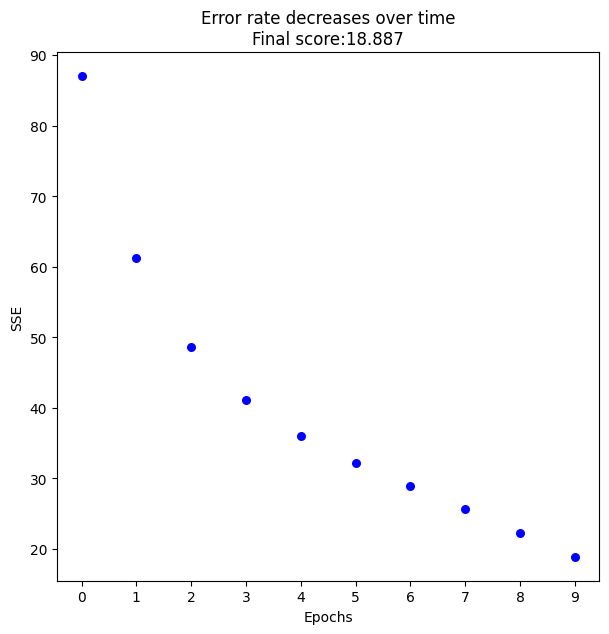

In [21]:
plt.rcParams.update({'figure.figsize':(7,7), 'figure.dpi':100})
a = np.array(amanda_NN.fit_statistics)

ax = plt.figure().gca()
plt.title("Error rate decreases over time\nFinal score:" + str(round(amanda_NN.final_score, 3)))
plt.xlabel("Epochs")
plt.ylabel("SSE")
plt.scatter(a[:,0], a[:,1], 30, c='b')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [22]:
#"Provide an example of the input and output for one true positive sequence and one true negative sequence."

pred_values = amanda_NN.predict(X_test, task=None)
pred_classes = amanda_NN.predict(X_test, task="round")

print("Input sequence:\n", X_test[:3])
print("Expected output:\n", y_test[:3])
print("Raw output:\n", pred_values[:3])
print("Final output:\n", pred_classes[:3])

Input sequence:
 [[0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0
  0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0
  0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
  0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0]]
Expected output:
 [[0]
 [0]
 [0]]
Raw output:
 [[0.32251941]
 [0.50225565]
 [0.40174388]]
Final output:
 [[0.]
 [1.]
 [0.]]


In [23]:
#Calcualte accuracy metrics. 

mae = round(mean_absolute_error(y_test, pred_classes), 4)
mse = round(mean_squared_error(y_test, pred_classes), 4)
r2 = round(r2_score(y_test, pred_classes), 4)
accuracy = round(accuracy_score(y_test, pred_classes), 4)

print([mae, mse, r2, accuracy])

[0.0746, 0.0746, 0.669, 0.9254]


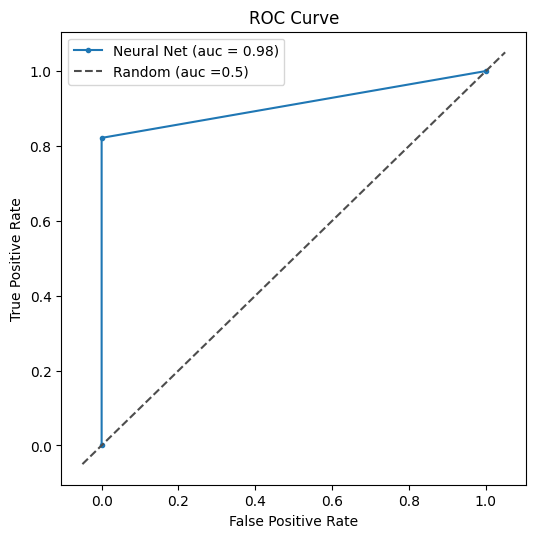

In [24]:
#Plot ROC Curve 

# calculate scores
fig, ax = plt.subplots(figsize=(6, 6))
nn_auc = roc_auc_score(pred_classes, y_test)
#print(round(nn_auc, 3))
nn_fpr, nn_tpr, _ = roc_curve(pred_classes, y_test)
plt.plot(nn_fpr, nn_tpr, marker='.', label='Neural Net (auc = 0.98)')
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", label="Random (auc =0.5)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [25]:
#fix response

## Part 3: Cross-validation (5 points)
5) Evaluate your model’s classification performance via k-fold cross validation.
> a. How can you use k-fold cross validation to determine your model’s performance?

> b. Given the size of your dataset, positive and negative examples, how would you select a value for ​k?​

> c. Using the selected value of k, determine a relevant metric of performance for each fold. Describe how your model performed under cross validation.

### Reponse:

> K-fold cross validation was selected over other similar methods like Leave-one-out and repeated k-Fold cross validation due to the dataset size, computational time, and coding time it will take me to write this by hand. For a range of possible k-folds ([2, 3, 4, 5, 6, 7, 8]), the mean-squared-error (MSE) and accuracy was evaluated. All values of k have a very small MSE as expected given this dataset is hard to not overfit. The accuracy score has a nice balance between too few training examples and too many around 4. Going forward I use a 30/70 test-train split and 4-fold cross validation. Both test and training data were randomly shuffled prior to model construction. 

> Overall, the model performed very well under cross validation. It performed so well in fact, that I'm actually not choosing the parameters with maximum accuracy in an effort to prevent overfitting. This is also why my number of epochs is suspiciously low. 

> Note: Not shown, but I also evaluated possible down sampling ratios (positive:negatives=[1:1, 1:1.5, 1:2]),  I move forward with a 1:1 ratio as the models were less likely to predict the most frequent class in the downstream steps.

In [26]:
def amanda_kfold_CV(classNN, X_train, y_train, k, flag):
    rando_index = np.random.permutation(X_train.shape[0])
    newarr = np.array_split(rando_index, k)
    #new array with lists of random indexes that represent each split. 
    a = []
    for mask in newarr: 
        not_mask = set(rando_index) - set(mask)
        #mask = all elements in the selected subset that is now my test. 
        #not_mask = all other elements not in held out set that is my training. 
        current_test = X_train[list(mask),]
        current_train = X_train[list(not_mask),]
        current_test_y = y_train[list(mask),]
        current_train_y = y_train[list(not_mask),]
        classNN.fit(input_data=current_train, 
                    expected_output = current_train_y,
                    epochs = 10, 
                    learning_rate = 1,
                    lam = 0, verbose=False)
        #predict classes using current test/train
        pred_classes = classNN.predict(current_test, task="round")
        if flag=="accuracy": val = round(accuracy_score(current_test_y, pred_classes), 4)
        elif flag=="mse": val = round(mean_squared_error(current_test_y, pred_classes), 4)
        elif flag=="mae": val = round(mean_absolute_error(current_test_y, pred_classes), 4)
        elif flag=="r2": val = round(r2_score(current_test_y, pred_classes), 4)
        else: print("oopsies"); exit()
        #append metrics to over all list. 
        a.append(val)
    return(a)
        
def amanda_plot_split(classNN, X_train, y_train, flag="accuracy"):
    #empty plotting vectors to fill. 
    my_k = []
    my_score_mean = []
    my_score_std = []
    
    for k in range(2,9,1): #for the Ks I want to try
        l = amanda_kfold_CV(amanda_NN, X_train, y_train, k, flag)
        my_k.append(k)
        my_score_mean.append(np.mean(l))
        my_score_std.append(np.std(l))
    
    my_score_mean = np.asarray(my_score_mean)
    my_score_std = np.asarray(my_score_std)

    plt.plot(my_k, my_score_mean, 'o-', color="g")
    plt.fill_between(my_k, 
                     (my_score_mean - my_score_std), 
                     (my_score_mean + my_score_std), alpha=0.1, color="g")
    plt.ylabel(flag)
    plt.xlabel('k-folds')
    #plt.title('Accuracy vs cross-fold')
    return(plt)

Text(0.5, 1.0, 'MSE vs cross-fold')

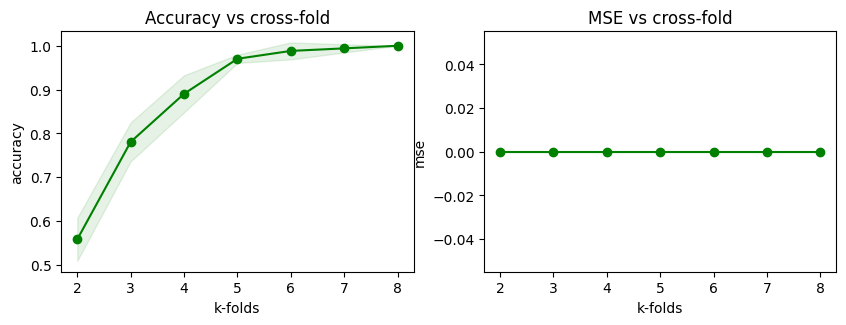

In [27]:
amanda_NN  = NN.NeuralNetwork(setup_nodes = (68, 10, 1), 
                             activation = "sigmoid", 
                             seed=1)


plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})

plt.subplot(2, 2, 1)
a = amanda_plot_split(amanda_NN, data, labels, flag="accuracy")
a.title('Accuracy vs cross-fold')

plt.subplot(2, 2, 2)
a=amanda_plot_split(amanda_NN, X_train, y_train, flag="mse")
a.title('MSE vs cross-fold')
#plt.subplot(2, 2, 2)
#amanda_plot_split(amanda_NN, X_train, y_train, flag="r2")

#plt.subplot(2, 2, 4)
#amanda_plot_split(amanda_NN, X_train, y_train, flag="mae")

In [28]:
#done

## Part 4: Extension (required but graded generously) (5 points)
Try something fun to improve your model performance! This should include implementation of alternative optimization methods (particle swarm, genetic algorithms, etc), you can also optionally add changes in the network architecture such as modifying the activation function, changing the architecture, adding regularization etc. For this section, we want to see a description of what you want to try and why. As long as we have this, and some effort towards implementation, you will get full points.
> What set of learning parameters works the best? Please provide sample output from your system.

> What are the effects of altering your system (e.g. number of hidden units or choice of kernel function)? Why do you think you observe these effects?

> What other parameters, if any, affect performance?

### Reponse pt1:

> I wanted to do a hyperparamter search in a more practical/thorough way by using sklearn. Then, I can try to implement some of the beneficial hyperparmaters in my own code. 

> I first set the permanent aspects 1) input layer of 68 dimensions 2) one hidden layer 3) output layer with 1 node.

> Next, the model was evaluated for the best batch size, number of epochs, optimizer, and loss function. From the coarse search it is apparent the model can easily overfit. Many of the accuracy scores are 1, which is not what we want to select. Rather than choose the "best_param" (or the first occurency with an accuracy of 1 in this case), I instead look at the average accuracy over the hyperparamters. This is implemented in the function amanda_average(). From this, we can see that generally the RMSprop optimizer, high epoch numbers, small batch sizes, and a MSE loss function perform the best. Binary cross entropy loss is a close second to MSE and I imagine that wouldn't make a major difference in this setting. 

> Finally, the neural net was evaluated on: learning rate, momentum, hidden layer neurons, dropout rate, activation function, and L2 regularization weights. 

Via grid search the final NN was built with: {'activation': 'relu', 'dropout_rate': 0.0, 'learn_rate': 0.01, 'momentum': 0.0, 'neurons': 10, 'weight': 0}. The NN had the best accuracy without any neuron dropout between the hidden and output layer interestingly. This is likely due to the small size of the test dataset where co-adapting neurons are not a large concern.

In [31]:
#create general function the grid search can call

def create_model(optimizer = "rsmprop", loss = "mean_squared_error"):
    # create model
    network = Sequential()
    network.add(Dense(units=10, activation='sigmoid', input_dim=68))
    network.add(Dense(units=10, activation='sigmoid'))
    network.add(Dense(units=1, activation='sigmoid'))
    # Compile model
    network.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return network

#create function that will average the accuracy over one parameter that was tried. 
def amanda_average(which):
    
    #average the accuracy for whatever your particular interest is. 
    coarse_look = {}
    for mean, stdev, param in zip(means, stds, params):
        base = param[which]
        if base in coarse_look: #for all elements that have the current parameter
            val = coarse_look[base]
            val.append(mean)
            coarse_look[base] = val #add values to list. 
        else: 
            coarse_look[base] = [mean]

    avgDict = {}
    for k,v in coarse_look.items():
        avgDict[k] = np.nansum(v)/ float(len(v))
    print(which,":")
    for k,v in sorted(avgDict.items(), key=operator.itemgetter(1)):
        print(k, v)
    #print("\n")
    return

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, RMSprop
from keras.regularizers import l2
from sklearn.model_selection import cross_val_score, GridSearchCV

seed = 7
np.random.seed(seed)
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [5, 10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adam', 'Adamax', 'Nadam']
loss = ['mean_squared_error', 'binary_crossentropy', 'hinge']
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer = optimizer, loss=loss)
print(param_grid)

model = KerasClassifier(build_fn=create_model, 
                        verbose=0)
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    n_jobs=-1, 
                    cv=4,
                    verbose = 2)
grid_result = grid.fit(X_train, y_train)

{'batch_size': [10, 20, 40, 60, 80, 100], 'epochs': [5, 10, 50, 100], 'optimizer': ['SGD', 'RMSprop', 'Adam', 'Adamax', 'Nadam'], 'loss': ['mean_squared_error', 'binary_crossentropy', 'hinge']}
Fitting 4 folds for each of 360 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  6.5min finished


In [36]:
#print all outputs 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'batch_size': 10, 'epochs': 10, 'loss': 'mean_squared_error', 'optimizer': 'RMSprop'}
0.496817 (0.096369) with: {'batch_size': 10, 'epochs': 5, 'loss': 'mean_squared_error', 'optimizer': 'SGD'}
0.740617 (0.130877) with: {'batch_size': 10, 'epochs': 5, 'loss': 'mean_squared_error', 'optimizer': 'RMSprop'}
0.776613 (0.169588) with: {'batch_size': 10, 'epochs': 5, 'loss': 'mean_squared_error', 'optimizer': 'Adam'}
0.577700 (0.057095) with: {'batch_size': 10, 'epochs': 5, 'loss': 'mean_squared_error', 'optimizer': 'Adamax'}
0.581431 (0.054774) with: {'batch_size': 10, 'epochs': 5, 'loss': 'mean_squared_error', 'optimizer': 'Nadam'}
0.577700 (0.057095) with: {'batch_size': 10, 'epochs': 5, 'loss': 'binary_crossentropy', 'optimizer': 'SGD'}
0.555312 (0.062439) with: {'batch_size': 10, 'epochs': 5, 'loss': 'binary_crossentropy', 'optimizer': 'RMSprop'}
0.651229 (0.191975) with: {'batch_size': 10, 'epochs': 5, 'loss': 'binary_crossentropy', 'optimizer': 'Adam'}
0.448310 (

In [37]:
#print average output by parameter tested. 

amanda_average("optimizer")
amanda_average("epochs")
amanda_average("batch_size")
amanda_average("loss")

optimizer :
SGD 0.527591819771462
Adamax 0.6661872923788097
Adam 0.7630536042981677
Nadam 0.7703097565099597
RMSprop 0.7825494157150388
epochs :
5 0.5436640308962928
10 0.579105696744389
50 0.8025125607848167
100 0.8824712225132518
batch_size :
100 0.6309600895891587
80 0.6604587346315384
60 0.6941286207487186
40 0.7054872687906026
20 0.7353371024131775
10 0.7852584502349297
loss :
hinge 0.6655760713542501
binary_crossentropy 0.7170247112090389
mean_squared_error 0.7232143506407738


> From output above, it is clear 1) the model usually overfits if given the opportunity. Generally the best parameters are RMSprop optimizer, high epoch numbers, small batch size, MSE loss -- but binary cross entropy is close second

> Lets do second half of paramter search now that we know the optimizer

In [38]:
#Similar function to above, but with a set optimizer so I can adjust momentum and learning rate. 

def create_model(learn_rate=0.01, momentum=0, activation='relu', neurons=1, weight=0.01, dropout_rate=0.0):
    # create model
    network = Sequential()
    network.add(Dense(units=neurons, 
                      activation=activation, 
                      input_dim=68,
                      kernel_regularizer=l2(weight), bias_regularizer=l2(weight)))
    network.add(Dense(units=neurons, 
                      activation=activation,
                      kernel_regularizer=l2(weight), bias_regularizer=l2(weight)))
    network.add(Dropout(dropout_rate))
    network.add(Dense(units=1, activation=activation))
    # Compile model
    optimizer = RMSprop(lr=learn_rate, momentum=momentum)
    network.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    return network

In [41]:
learn_rate = [0.001, 0.01, 0.1]
momentum = [0.0, 0.4, 0.8]
neurons = [5, 10, 20, 40]
dropout_rate = [0.0, 0.4, 0.8]
activation = ['softmax', 'relu', 'tanh', 'sigmoid','linear'] 
weight = [0, 0.001, 0.01, 0.1]
param_grid = dict(learn_rate=learn_rate, 
                  momentum=momentum,
                  neurons = neurons,
                  activation = activation,
                  dropout_rate = dropout_rate,
                  weight = weight)
print(param_grid)

{'learn_rate': [0.001, 0.01, 0.1], 'momentum': [0.0, 0.4, 0.8], 'neurons': [5, 10, 20, 40], 'activation': ['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], 'dropout_rate': [0.0, 0.4, 0.8], 'weight': [0, 0.001, 0.01, 0.1]}


In [ ]:
model = KerasClassifier(build_fn=create_model, 
                        epochs=100, 
                        batch_size=10, 
                        verbose=0)

#Cross fold validation (k=5) and grid search
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    n_jobs=-1, 
                    cv=4,
                    verbose = 2)
grid_result = grid.fit(X_train, y_train)

Fitting 4 folds for each of 2160 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 50.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 60.2min


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
amanda_average("learn_rate")
amanda_average("momentum")
amanda_average("activation")
amanda_average("neurons")
amanda_average("dropout_rate")
amanda_average("weight")

In [34]:
# no l2 regularization, no drop-out.
#softmax and neuron =5 is clearly overfitting. 
#momentum 0 vs 0.4 is about the same so lets simplify. 
seed = 7
np.random.seed(seed)

nn_final = Sequential()
nn_final.add(Dense(units=10, 
                   activation='relu', 
                   input_dim=68))
nn_final.add(Dense(units=10, 
                   activation='relu'))
nn_final.add(Dense(units=2, activation="softmax"))
#optimizer = SGD(lr=0.001, momentum=0)
optimizer = RMSprop(lr=0.01, momentum=0)
nn_final.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
nn_final.fit(X_train, new_y_train)

8/8 [==============================] - 0s 947us/step - loss: 0.5397 - accuracy: 0.7797


### Reponse pt2:

> Now, to implement some of these changes in my code I added the activation function "relu" option and I added a new loss function option " ". 

In [ ]:
#running my own code with new updates:

In [ ]:
#need to write response 1, response 2, implement new code, and run it here. 

## Part 5: Evaluate your network on the final set.
6) To provide an objective measure of your neural network's ability to classify binding sites, a test dataset has been provided (rap1-lieb-test.txt). There are no class labels on these sequences. Your goal is to maximize the separation in scores for the true Rap1 binding sites as compared with the non-sites.
> a. Select a final model (encoding, architecture, training regime). This can be the same as your model in Part 3, Part 4, or something completely different.

> b. Train your final model on the entire training dataset. Run the trained system on the test dataset. For each sequence, output the sequence and its output value from the network, separated by a tab, as follows:

> ACATCCGTGCACCATTT 0.927 AAAAAAACGCAACTAAT 0.123

>If you do not use the full 17 bases, please still output the original sequence in column 1 and the binding score in column 2, as in the above example.

### Reponse:

> Final file can be found in main directory as "rap1-lieb-test-PREDICTIONS.txt"

In [97]:
Rap1_pos = NN.process_positives("data/rap1-lieb-positives.txt")
neg = NN.process_negatives(fastafile = "data/yeast-upstream-1k-negative.fa", 
                            downsample = 200, len_k = 17,     
                            record = True, 
                            seed = 10) 
Rap1_neg = neg[2]
x = np.array([[1],[0]])
labels = np.repeat(x, [len(Rap1_pos), len(Rap1_neg)], axis=0)
data = np.vstack((Rap1_pos, Rap1_neg))

data, labels = unison_shuffled_copies(data, labels)

In [98]:
DNA = []
encoded_DNA = []
for line in open("data/rap1-lieb-test.txt", "r"):
    seq = line.strip()
    DNA.append(seq)
    input_vals = NN.oneHotDNA(seq, flatten=True)
    encoded_DNA.append(input_vals)

new_data = np.asarray(new_data)

In [93]:
final_NN  = NN.NeuralNetwork(setup_nodes = (68, 10, 1), 
                             activation = "sigmoid", 
                             seed=1)

final_NN.fit(input_data=data, 
                    expected_output = labels,
                    epochs = 10, 
                    learning_rate = 1,
                    lam = 0, verbose=False)
pred = final_NN.predict(new_data, task=None)

[[0.42510225]
 [0.5000862 ]
 [0.37841245]
 ...
 [0.4187434 ]
 [0.43162914]
 [0.49449921]]


In [106]:
f = open('rap1-lieb-test-PREDICTIONS.txt', 'w')
for name, score in zip(DNA, pred):
    f.write(name + "\t" + str(score[0]) + "\n")
    #print(name+"\t", score[0])
f.close()

In [ ]:
#would need to update this part with final model

## Part 6: Automated Testing with Github Workflows (1 point)
The project skeleton is currently set up with a “workflow” that triggers when a commit is pushed to the main branch. This runs pytest with your python testing files located in the /test/​ folder.

In [ ]:
#amanda still do 

## Other graded requirements:
1. API/Docs - 2 point
2. Thoughtful code structure - 2 point

In [ ]:
# Used Sphinx -- go to github: 
#open aseveritt/BMI203_Project3/docs/build/html/index.html

In [ ]:
#done